In [83]:
#importing modules
import pandas as pd #for data manipulation
import numpy as np #for scientific computing
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for even cool statistical data visualization
from sklearn import tree #for machine learning purposes
from sklearn.metrics import accuracy_score #for machine learning purposes
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#figures inline
%matplotlib inline 
sns.set() #set visualization style

In [84]:
telco = pd.read_csv('Telco_Customer_Churn.csv')
telco.head() #view first few lines of telco customer churn data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [85]:
telco.info() #check datatypes, missing values, and more

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

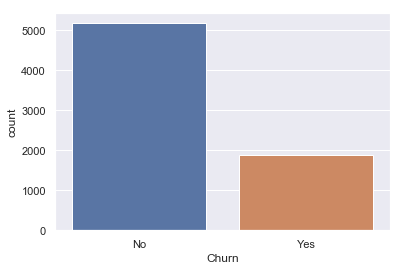

In [87]:
#check distribution of target variable
sns.countplot(x="Churn", data=telco);

In [88]:
telco['TotalCharges'] = telco["TotalCharges"].replace(" ",np.nan) #replacing blank spaces with null
print("Number of null values in TotalCharges column: ", telco["TotalCharges"].isnull().sum()) #check total number of null values

telco = telco[telco["TotalCharges"].notnull()] #keeping only not-null values
telco = telco.reset_index()[telco.columns]
print("Number of null values in TotalCharges column after cleaning: ", telco["TotalCharges"].isnull().sum())

telco["TotalCharges"] = telco["TotalCharges"].astype(float) #changing data type from object to float
print("Data type of TotalCharges: ", telco['TotalCharges'].dtype)

('Number of null values in TotalCharges column: ', 11)
('Number of null values in TotalCharges column after cleaning: ', 0)
('Data type of TotalCharges: ', dtype('float64'))


In [89]:
#changing numerical to categorical
telco["SeniorCitizen"] = telco["SeniorCitizen"].replace({1:"Yes", 0:"No"})
telco["SeniorCitizen"].head()

0    No
1    No
2    No
3    No
4    No
Name: SeniorCitizen, dtype: object

In [90]:
#grouping of tenure
def tenure_lab(telco) :
    if telco["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telco["tenure"] > 12) & (telco["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telco["tenure"] > 24) & (telco["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telco["tenure"] > 48) & (telco["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telco["tenure"] > 60 :
        return "Tenure_gt_60"
    
telco["tenure_group"] = telco.apply(lambda telco:tenure_lab(telco), axis=1)

In [92]:
# separate numerical and categorical columns
numeric_cols = ['MonthlyCharges', 'TotalCharges', 'tenure']
target_col = ['Churn']
ignored_cols = ['customerID']
categorical_cols = telco.select_dtypes(include='object').columns
categorical_cols = [col for col in categorical_cols if col not in target_col + ignored_cols]

In [93]:
# convert categorical into numerical
for col in categorical_cols:
    telco[col] = LabelEncoder().fit_transform(telco[col])

telco['Churn'] = telco['Churn'].map({'Yes' : 1, 'No' : 0})

In [94]:
# Scaling all numerical variables
telco[numeric_cols] = StandardScaler().fit_transform(telco[numeric_cols])


C:\Users\tandonsl\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\tandonsl\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [96]:
# Separate into target and feature dataset
X = telco.drop(['Churn','customerID'],axis=1)
y = telco['Churn']

In [97]:
# split into training and test dataset
train_x,text_x,train_y,test_y = train_test_split(X,y, test_size=0.3, random_state=42)
print(train_df.shape)
train_x.head()

(4922, 21)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group
3939,0,0,0,0,-0.954296,0,1,0,2,0,2,2,2,2,0,0,3,-0.209355,-0.769188,0
3388,1,0,0,0,-0.261649,1,2,0,2,2,0,0,0,0,1,0,2,-0.107972,-0.309427,2
1630,0,0,0,0,-1.198760,1,0,0,0,0,2,0,2,2,1,1,2,0.171248,-0.910104,0
4081,1,0,0,0,-1.035784,1,2,1,0,0,0,0,0,0,0,0,2,0.292575,-0.777946,0
1881,1,0,1,1,1.408853,1,0,0,2,0,2,2,0,0,2,1,0,-0.146198,0.736959,4


In [163]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=13)

In [164]:
clf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [165]:
y_pred = clf.predict(text_x)

In [166]:
clf.score(text_x,test_y)

0.7786729857819905

In [167]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_y,y_pred))
confusion_matrix(test_y,y_pred)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1549
           1       0.62      0.45      0.52       561

   micro avg       0.78      0.78      0.78      2110
   macro avg       0.72      0.67      0.69      2110
weighted avg       0.76      0.78      0.77      2110



array([[1393,  156],
       [ 311,  250]], dtype=int64)

In [213]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=5)

In [214]:
clf_knn.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [215]:
y_pred_knn = clf_knn.predict(text_x)

In [216]:
clf_knn.score(text_x,test_y)

0.7573459715639811

In [217]:
print(classification_report(test_y,y_pred_knn))
confusion_matrix(test_y,y_pred_knn)

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1549
           1       0.54      0.53      0.54       561

   micro avg       0.76      0.76      0.76      2110
   macro avg       0.69      0.69      0.69      2110
weighted avg       0.76      0.76      0.76      2110



array([[1298,  251],
       [ 261,  300]], dtype=int64)